# Dataset
init, len, getitem 구현 

텍스트 파일 읽고, indexing 했을때 (한글문장, 영어 문장 )반환하기(이게 기본), 벡터로 반환하기 (이게 기술)

In [ ]:
# 이게 기본
import torch

class Dataset():
    def __init__(self):
        with open('./kor.txt') as f:
            lines = f.readlines()
        sources, targets = [], []
        for line in lines:
            tgt, src, _ = line.split('\t')  # 영어, 한국어,
            sources.append(src)
            targets.append(tgt)
        self.sources, self.targets = self.load_dataset()
        
    def __len__(self): 
        return len(self.sources)
    
    def __getitem__(self, index): 
        return self.sources[index], self.targets[index]
        
dataset =Dataset()

dataset[10]

In [2]:
# 여기가 잔기술
from transformers import BertTokenizer

class Dataset():
    
    def __init__(self):
        self.src_tokenizer = BertTokenizer.from_pretrained('klue/bert-base')  # 한국어 토크나이저
        self.tgt_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')  # 영어 토크나이저
        
        self.src_vocab_size = self.src_tokenizer.vocab_size
        self.tgt_vocab_size = self.tgt_tokenizer.vocab_size
        
        self.sources, self.targets = self.load_dataset()
        
    def __len__(self):
        return len(self.sources)
    
    def __getitem__(self, index):
        return self.sources[index], self.targets[index]
        
    def load_dataset(self):
        sources, targets = [], []
        
        with open('./kor.txt') as f:
            lines = f.readlines()
        
        for line in lines:
            target, source, _ = line.split('\t')  # 영어, 한국어, _
            
            source_tokens = self.src_tokenizer.encode(source)
            target_tokens = self.tgt_tokenizer.encode(target)
            
            sources.append(source_tokens)
            targets.append(target_tokens)
        
        return sources, targets
dataset =Dataset()

dataset[10]

# DataLoader
init , len , iter 구현

for문을 돌면서 배치를 뱉어야한다. 패딩된 배치 텐서 반환

In [ ]:
# import numpy


class DataLoader():
    def __init__(self, dataset,batch_size, shuffle):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        
    def __len__(self):
        n_samples = len(self.dataset)
        batch_size = self.batch_size
        return n_samples // batch_size + (n_samples % batch_size !=0)
    
    def __iter__(self):
        # for 문을 돌면서 배치를 뱉어야한다. 패딩된 배치 텐서 반환(튜플)
        n_samples = len(self.dataset)
        indices = np.arange(n_samples)
        
        if self.shuffle:
            indices = np.random.permutation(indices)
            
        for i in range(len(self)):
            start = i*batch_size
            end = (i + 1) * batch_size
            
            batch_indices = indices[start:end]
            batch_sources = []
            batch_targets =[]
            
            for index in batch_indices:
                source, target = self.dataset[indx]
                
                source =
                target = 
                batch_sources.append(source)
                bathc_targets.append(target)
            
            #밑에 그림 참조
            batch_sources = 
            batch_targets = 
                yield batch_sources, batch _targets
            
        

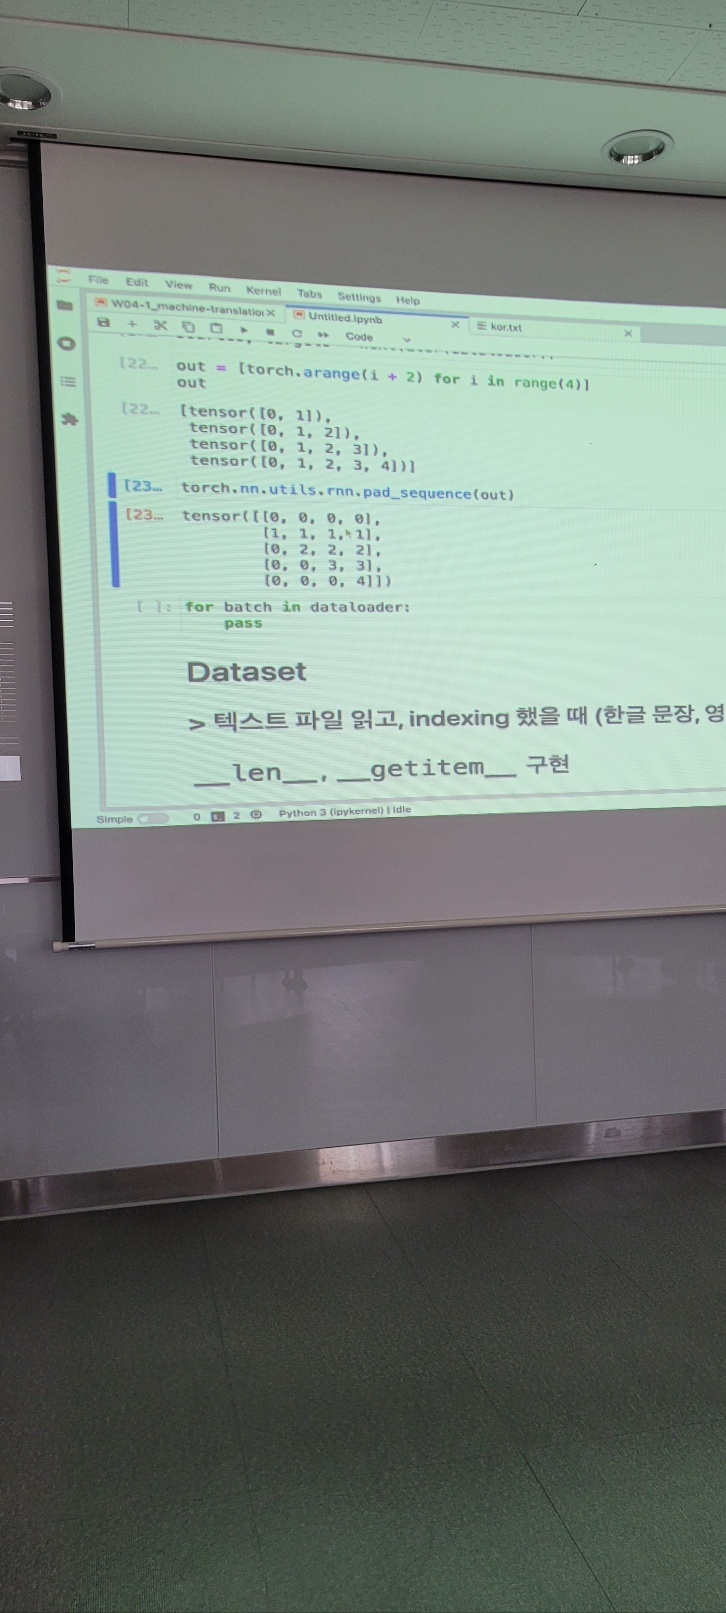

In [ ]:
dataloader = DataLoader(dataset,batch_size=16, shuffle=True)
len(dataloader)

In [ ]:
soruces ,targets = next(iter(dataloader)

In [ ]:
sources.shape # seq_len(가장 긴거임),batch_size 

# model
init, forward, inference 


In [ ]:
# 일단 이렇게 만들고 흘려보자 
import torch.nn as nn
class Model(nn.Module):
     def __init__(self):
        super().__init__()
        pass
    def forward(self,x):
        return x

In [ ]:
# 일단 이렇게 만들고 흘려보자 
model = Model()

model(sources).shape


In [ ]:
# 본격적으로                            
class Model(nn.Module):
     def __init__(self):
        super().__init__()
        pass
    def forward(self,x):
        return x
    